# PS Injection Dispersion Mismatch

### Compare optics for SEM Grid BSGH52 measurement lattice and used MD211 lattice. 
- Note that MD211 refers to this simulation repository, PS_Transfer is another respository found: https://github.com/HaroonRafique/PS_Transfer in which the transfer line dispersion mismatch SEM grid measurements are understood using space charge simulations

### imports

In [1]:
import os
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import floor, log10

#! pip install --user wand
#import wand
from wand.image import Image as WImage

### Function Definitions

In [2]:
# Function to print lines between min_ and max_ values
def print_some_lines(line_list, min_, max_):
    j = 0
    for i in madx_simulation_lines:
        if (j <= max_) and (j >= min_):
            print i
        j = j + 1
    return

print_all_lines = lambda x: sys.stdout.write("\n".join(x) + "\n")


In [3]:
def round_sig(x, sig=3):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [4]:
########################################################################
# Read PTC Twiss and return dictionary of columns/values
########################################################################
def Read_PTC_Twiss_Return_Dict(filename, verbose=True):
    # Dictionary for output
    d = dict()
    d['HEADER_FILENAME'] = [filename]
    keywords = ''
    
    # First we open and count header lines
    fin0=open(filename,'r').readlines()
    headerlines = 0
    for l in fin0:
        # Store each header line
        headerlines = headerlines + 1
        # Stop if we find the line starting '* NAME'
        if '* NAME' in l:
            keywords = l
            break
        # Store the headers as d['HEADER_<name>'] = <value>
        else:
            #try:
            #    d[str('HEADER_'+l.split()[1])]=[float(l.split()[-1])]     
            #except ValueError:
            #    d[str('HEADER_'+l.split()[1])]=[str(l.split()[-1])]   
            if '"' in l:
                d[str('HEADER_'+l.split()[1])]=[str(l.split('"')[1])]
            else:
                d[str('HEADER_'+l.split()[1])]=[float(l.split()[-1])]                 
    headerlines = headerlines + 1    
    
    if verbose: print '\nRead_PTC_Twiss_Return_Dict found Keywords: \n',keywords
    
    # Make a list of column keywords to return (as an aid to iterating)
    dict_keys = []
    for key in keywords.split():
        dict_keys.append(key)
    dict_keys.remove('*')
    
    if verbose: print '\nRead_PTC_Twiss_Return_Dict Dict Keys: \n',dict_keys
    
    # Initialise empty dictionary entries for column keywords 
    for key in dict_keys:
        d[key]=[]
        
    if verbose: 
        print '\nRead_PTC_Twiss_Return_Dict header only dictionary \n'
        for i in d:
            print i, d[i]
    
    # Strip header
    fin1=open(filename,'r').readlines()[headerlines:]   
    
    # Populate the dictionary line by line
    for l in fin1:
        i = -1        
        for value in l.split():
            i = i+1
            if 'NAME' in dict_keys[i]:
                d[dict_keys[i]].append(str(value))
            else:
                d[dict_keys[i]].append(float(value))    
                
    # Return list of column keywords 'dict_keys', and dictionary 'd'
    return dict_keys, d

### Plot Parameters

In [5]:
plt.rcParams['figure.figsize'] = [8.0, 5.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['lines.linewidth'] = 1.5

In [6]:
save_folder = 'Plots/'

legend_label = 'Case'
main_label = 'PS_Dispersion_Mismatch_Lattice'

# Step 1: Run MAD-X for both cases

- Note we use different MAD-X versions to show an important difference in output

In [7]:
madx_command = '../../madx-linux64_v5_02_00 < MD211_Flat_file.madx'
os.system(madx_command)

0

In [8]:
#madx_command = '../../madx-linux64_v5_02_00 < PS_Transfer_flat_file.madx'
madx_command = '../../madx-50502 < PS_Transfer_flat_file.madx'

os.system(madx_command)

0

# Step 2: Load TFS tables

In [9]:
d_md211_keys, d_md211 = Read_PTC_Twiss_Return_Dict('md211_final.tfs')


Read_PTC_Twiss_Return_Dict found Keywords: 
* NAME                                S               BETX               BETY               ALFX               ALFY              DISP1              DISP2              DISP3              DISP4                  X                 PX                  Y                 PY                MU1                MU2 


Read_PTC_Twiss_Return_Dict Dict Keys: 
['NAME', 'S', 'BETX', 'BETY', 'ALFX', 'ALFY', 'DISP1', 'DISP2', 'DISP3', 'DISP4', 'X', 'PX', 'Y', 'PY', 'MU1', 'MU2']

Read_PTC_Twiss_Return_Dict header only dictionary 

HEADER_ETA_C [-0.1342204838]
HEADER_TCOMIN [0.0]
HEADER_BETA11MIN [11.57151266]
HEADER_DELTAP [0.0]
HEADER_BETA33MIN [0.0]
HEADER_TCOMAX [0.0]
HEADER_PC [2.14]
HEADER_BETA22MAX [23.63949582]
HEADER_BETA12MIN [0.0]
HEADER_ALPHA_C [0.02701793732]
HEADER_BETA_X_MAX [23.1637637]
HEADER_BETA_X_MIN [11.57151266]
HEADER_ALPHA_C_P2 [-1000000.0]
HEADER_ALPHA_C_P3 [-1000000.0]
HEADER_BETA13MIN [0.0]
HEADER_TITLE ['Flat file generation for PTC

In [10]:
d_ps_transfer_keys, d_ps_transfer = Read_PTC_Twiss_Return_Dict('ps_transfer_final.tfs')


Read_PTC_Twiss_Return_Dict found Keywords: 
* NAME                                S               BETX               BETY               ALFX               ALFY              DISP1              DISP2              DISP3              DISP4                  X                 PX                  Y                 PY                MU1                MU2 


Read_PTC_Twiss_Return_Dict Dict Keys: 
['NAME', 'S', 'BETX', 'BETY', 'ALFX', 'ALFY', 'DISP1', 'DISP2', 'DISP3', 'DISP4', 'X', 'PX', 'Y', 'PY', 'MU1', 'MU2']

Read_PTC_Twiss_Return_Dict header only dictionary 

HEADER_ETA_C [-0.1342220113]
HEADER_TCOMIN [-0.0]
HEADER_BETA11MIN [11.55945384]
HEADER_DELTAP [0.0]
HEADER_BETA33MIN [0.0]
HEADER_TCOMAX [-0.0]
HEADER_PC [2.14]
HEADER_BETA22MAX [23.76116924]
HEADER_BETA12MIN [0.0]
HEADER_ALPHA_C [0.02701642005]
HEADER_BETA_X_MAX [23.19539083]
HEADER_BETA_X_MIN [11.55945384]
HEADER_ALPHA_C_P2 [-1000000.0]
HEADER_ALPHA_C_P3 [-1000000.0]
HEADER_BETA13MIN [0.0]
HEADER_TITLE ['Flat file generation for 

### Note that there is a slight difference in the tune between these lattices

In [11]:
print 'PS Transfer Lattice (fractional) Tunes = (', round_sig(d_ps_transfer['HEADER_Q1'][0],4), ',', round_sig(d_ps_transfer['HEADER_Q2'][0],4), ')' 

PS Transfer Lattice (fractional) Tunes = ( 0.2095 , 0.2401 )


In [12]:
print 'MD211 Lattice (fractional) Tunes = (', round_sig(d_md211['HEADER_Q1'][0],4), ',', round_sig(d_md211['HEADER_Q2'][0],4), ')' 

MD211 Lattice (fractional) Tunes = ( 0.2095 , 0.2451 )


# Step 3: Check s position of elements

The first element in the PS_Transfer sims is the SEM Grid

In [13]:
print 's [m]\t\tNAME'
print '---------------------------------------'
print d_ps_transfer['S'][-3], '\t\t', d_ps_transfer['NAME'][-3]
print d_ps_transfer['S'][-2], '\t\t', d_ps_transfer['NAME'][-2]
print d_ps_transfer['S'][-1], '\t\t', d_ps_transfer['NAME'][-1]
print d_ps_transfer['S'][0], '\t\t', d_ps_transfer['NAME'][0]
print d_ps_transfer['S'][1], '\t\t', d_ps_transfer['NAME'][1]
print d_ps_transfer['S'][2], '\t\t', d_ps_transfer['NAME'][2]
print d_ps_transfer['S'][3], '\t\t', d_ps_transfer['NAME'][3]
print d_ps_transfer['S'][4], '\t\t', d_ps_transfer['NAME'][4]

s [m]		NAME
---------------------------------------
628.2251 		"PS52$START"
628.3185 		"DRIFT_152"
628.3185 		"PSPI.BSG52_P_"
0.0 		"PI.BSG52"
1.5066 		"DRIFT_0"
1.5066 		"PS52$END"
1.5066 		"PR.BHR52$START"
1.5066 		"MP_D"


The first element in the MD211 sims is the horizontal wirescanner

In [14]:
print 's [m]\t\tNAME'
print '---------------------------------------'
print d_md211['S'][-3], '\t\t', d_md211['NAME'][-3]
print d_md211['S'][-2], '\t\t', d_md211['NAME'][-2]
print d_md211['S'][-1], '\t\t', d_md211['NAME'][-1]
print d_md211['S'][0], '\t\t', d_md211['NAME'][0]
print d_md211['S'][1], '\t\t', d_md211['NAME'][1]
print d_md211['S'][2], '\t\t', d_md211['NAME'][2]
print d_md211['S'][3], '\t\t', d_md211['NAME'][3]
print d_md211['S'][4], '\t\t', d_md211['NAME'][4]

s [m]		NAME
---------------------------------------
627.5155 		"PS65$START"
628.3185 		"DRIFT_4"
628.3185 		"PSPR.BWSH65_P_"
0.0 		"PR.BWSH65"
0.797 		"DRIFT_0"
0.797 		"PS65$END"
0.797 		"PR.BHT65$START"
0.797 		"MP65_F"


The BSG52 SEM grid is not present in the lattice of MD211, but we must find the distance between to plot correctly

In [15]:
print 's [m]\t\tNAME'
print '---------------------------------------'
print d_ps_transfer['S'][144], '\t\t', d_ps_transfer['NAME'][144]
print d_ps_transfer['S'][145], '\t\t', d_ps_transfer['NAME'][145]
print d_ps_transfer['S'][146], '\t\t', d_ps_transfer['NAME'][146]
print d_ps_transfer['S'][147], '\t\t', d_ps_transfer['NAME'][147]
print d_ps_transfer['S'][148], '\t\t', d_ps_transfer['NAME'][148]
print d_ps_transfer['S'][149], '\t\t', d_ps_transfer['NAME'][149]

s [m]		NAME
---------------------------------------
80.748005 		"MP_F"
80.748005 		"PR.BHU64$END"
80.748005 		"PS65$START"
81.551005 		"DRIFT_20"
81.551005 		"PR.BWSH65"
82.348005 		"DRIFT_21"


PS65$START is at 81.551005 m in the PS Transfer lattice

In [16]:
#s_offset = 628.3185 - 552.67728 + 1.5066 + 4.5 #4.5m fudge for alignment
s_offset = 81.551005

print 'S offset = ', s_offset, 'm'

S offset =  81.551005 m


# Step 4: Plot to compare optics

Note that the output of PTC Twiss is different when using different MAD-X versions. Using MAD-X v5.02.00 is currently required for creation of a valid PTC flat file (15.06.20). PTC_Twiss output values must be normalised with $\frac{1}{\beta}$, where $\beta = \frac{v}{c}$ is the reduced velocity. When using MAD-X v5.05+ this normalisation is already included.

- MD211 PTC Twiss is here performed with MAD-X v5.02.00
- PS Transfer PTC Twiss is here performed with MAD-X v5.05

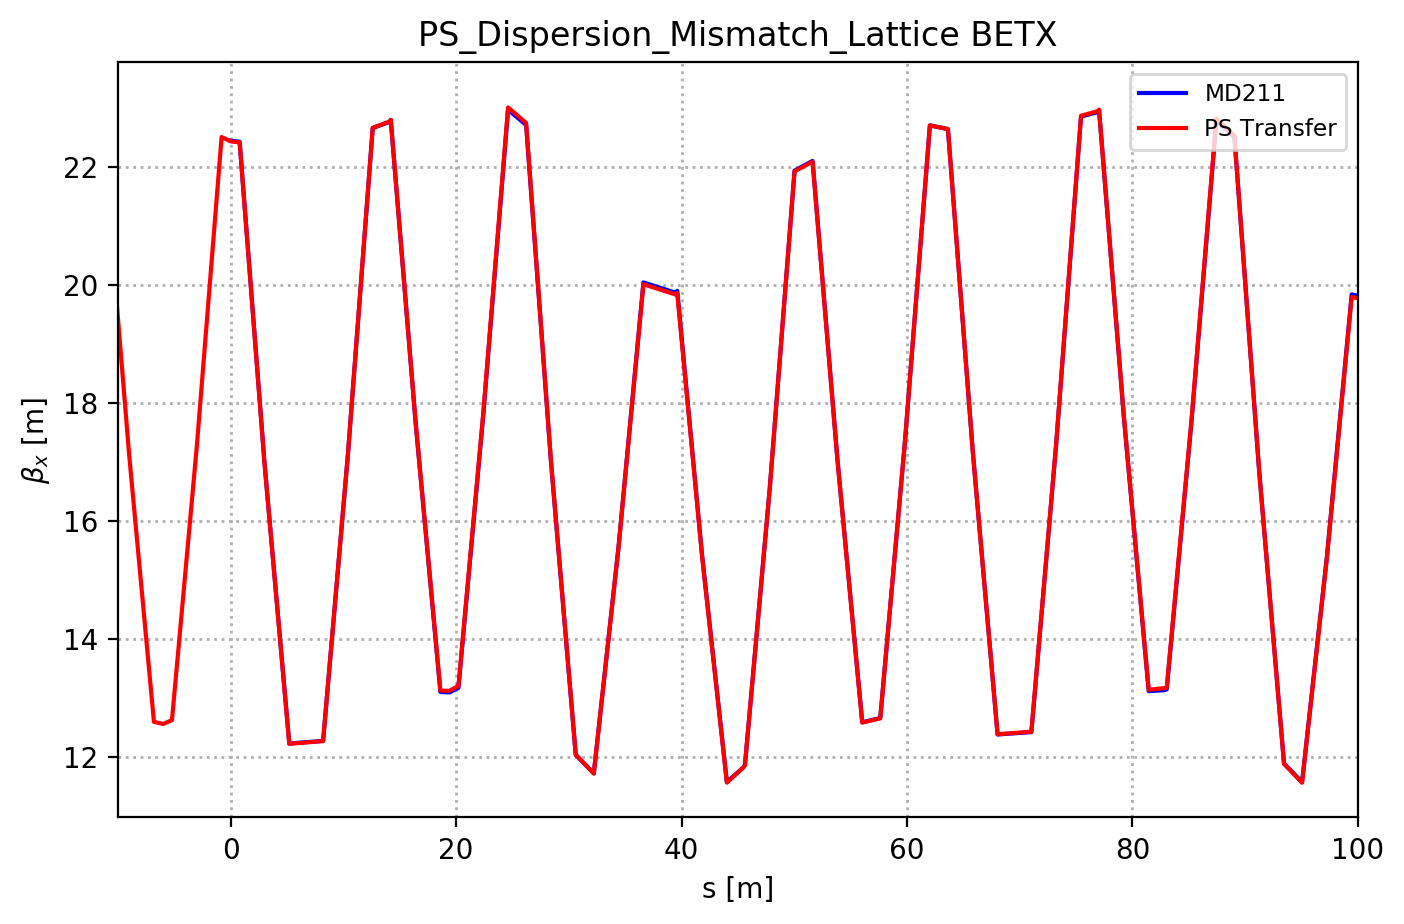

In [17]:
parameter = 'BETX'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'$\beta_x$ [m]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');
#ax1.plot(d_ps_transfer['S'], d_ps_transfer[parameter], label='PS Transfer', color='r');
ax1.plot(x, y, label='PS Transfer', color='r');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-10,100)

savename = save_folder + '/'+ main_label + '_' + parameter + '_zoom.png'
plt.savefig(savename, dpi = 200);

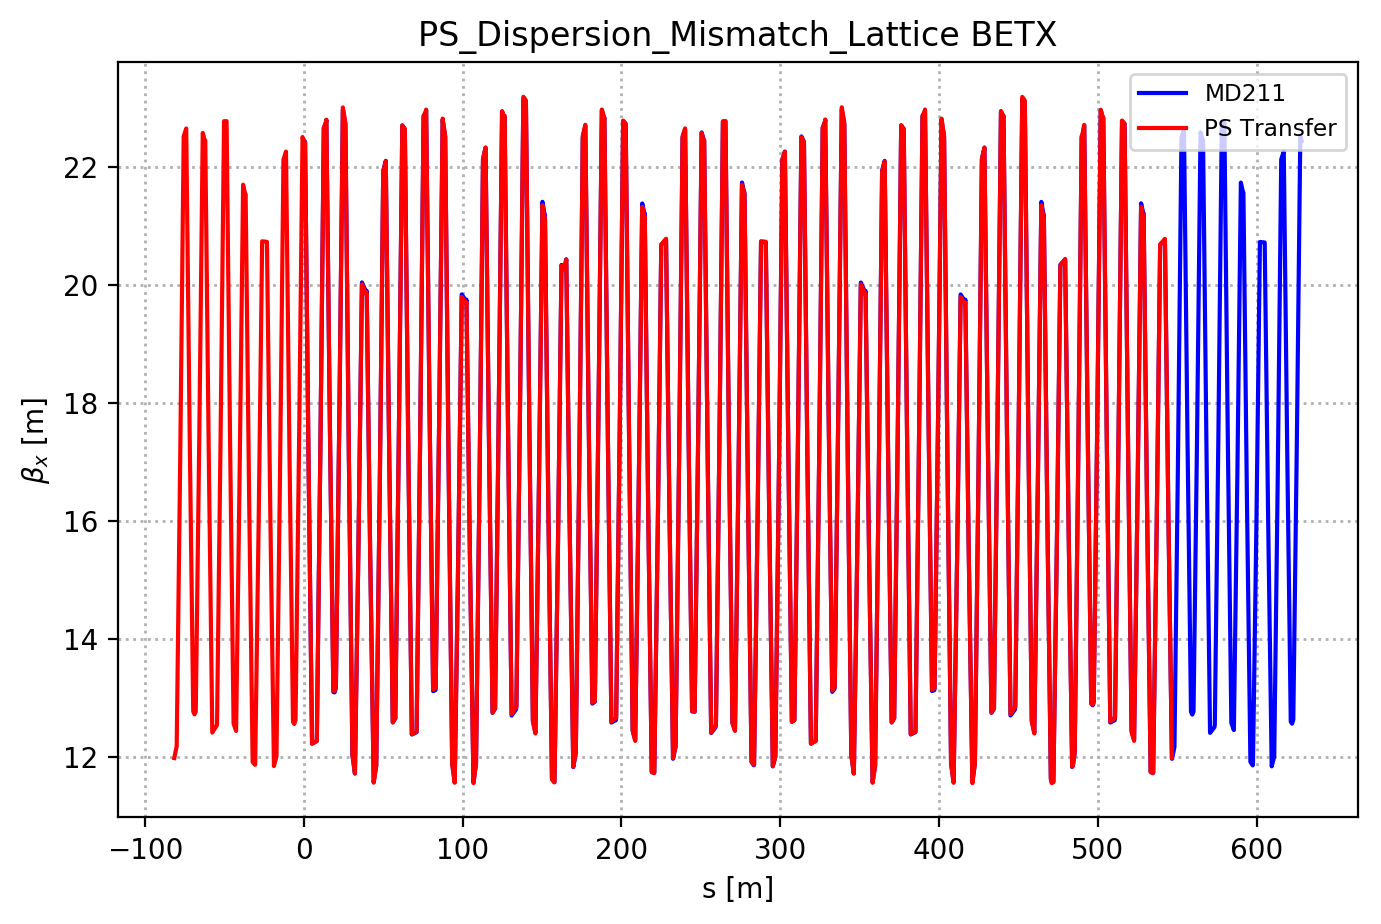

In [18]:
parameter = 'BETX'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'$\beta_x$ [m]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');
#ax1.plot(d_ps_transfer['S'], d_ps_transfer[parameter], label='PS Transfer', color='r');
ax1.plot(x, y, label='PS Transfer', color='r');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-10,10)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 200);

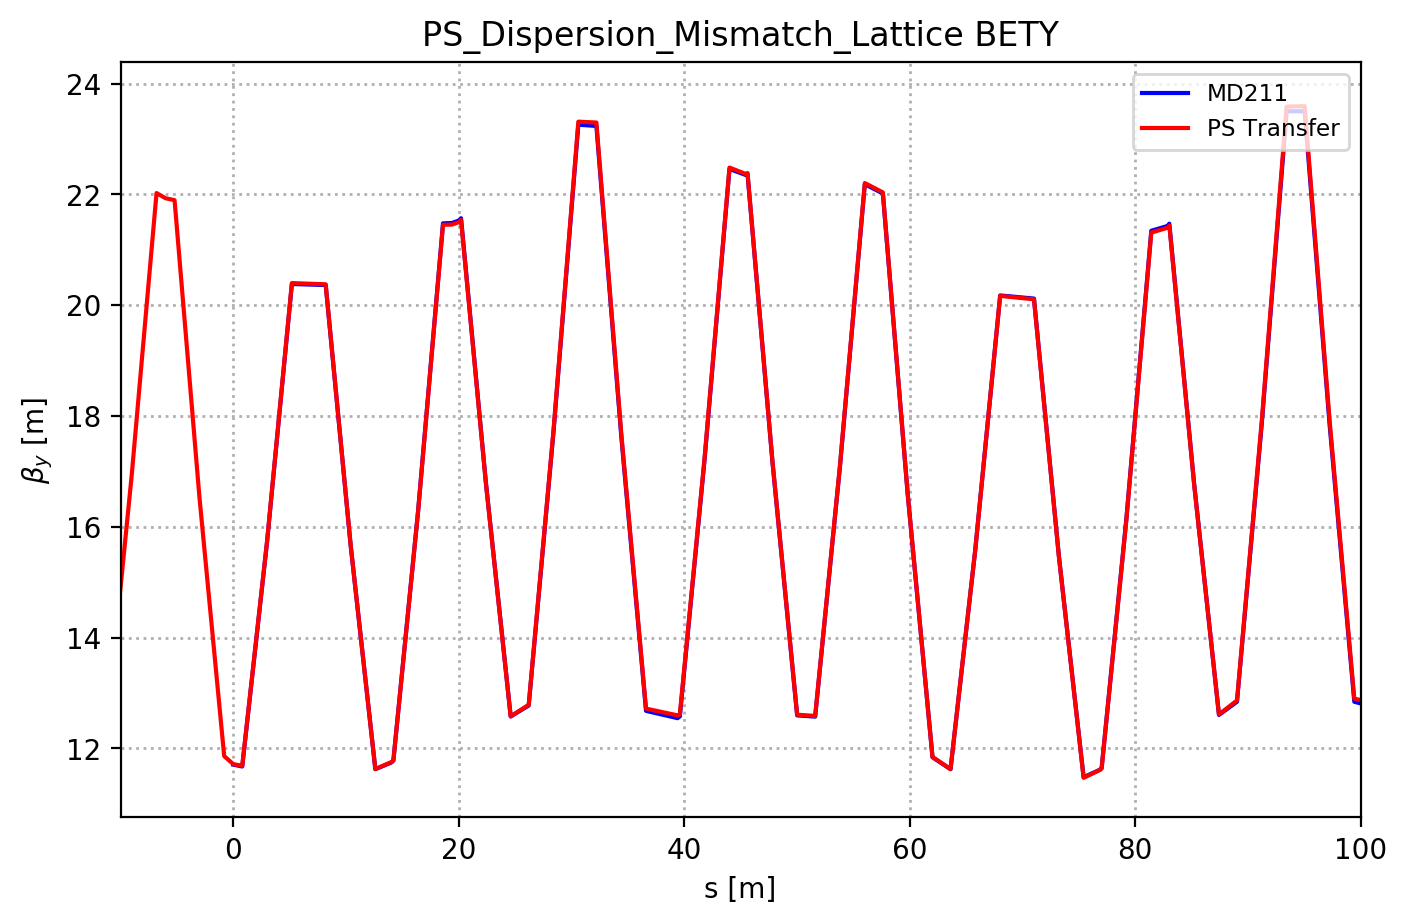

In [19]:
parameter = 'BETY'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'$\beta_y$ [m]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');
#ax1.plot(d_ps_transfer['S'], d_ps_transfer[parameter], label='PS Transfer', color='r');
ax1.plot(x, y, label='PS Transfer', color='r');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-10,100)

savename = save_folder + '/'+ main_label + '_' + parameter + '_zoom.png'
plt.savefig(savename, dpi = 200);

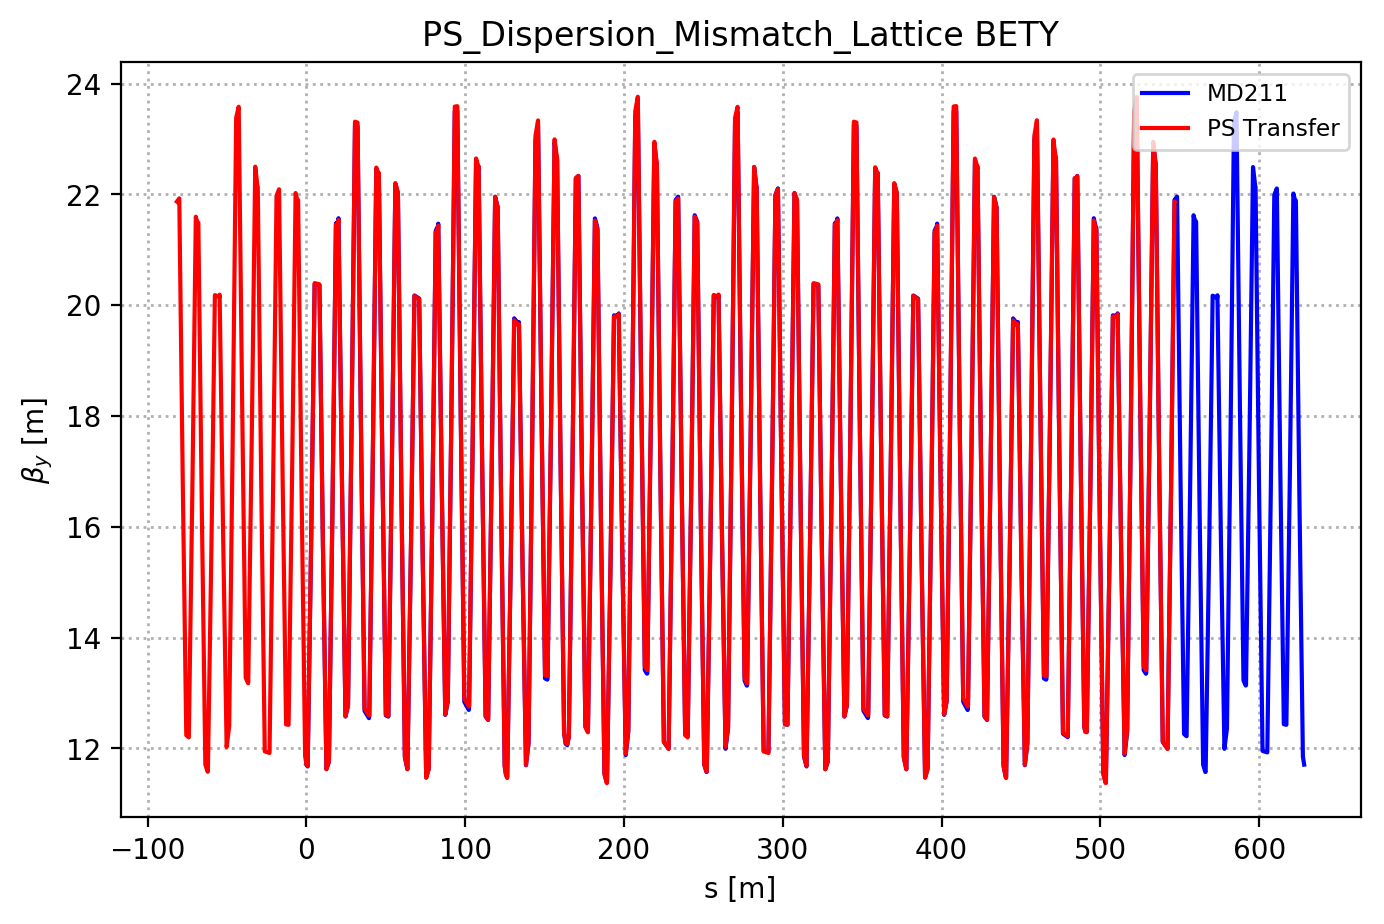

In [20]:
parameter = 'BETY'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'$\beta_y$ [m]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');
#ax1.plot(d_ps_transfer['S'], d_ps_transfer[parameter], label='PS Transfer', color='r');
ax1.plot(x, y, label='PS Transfer', color='r');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-10,10)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 200);

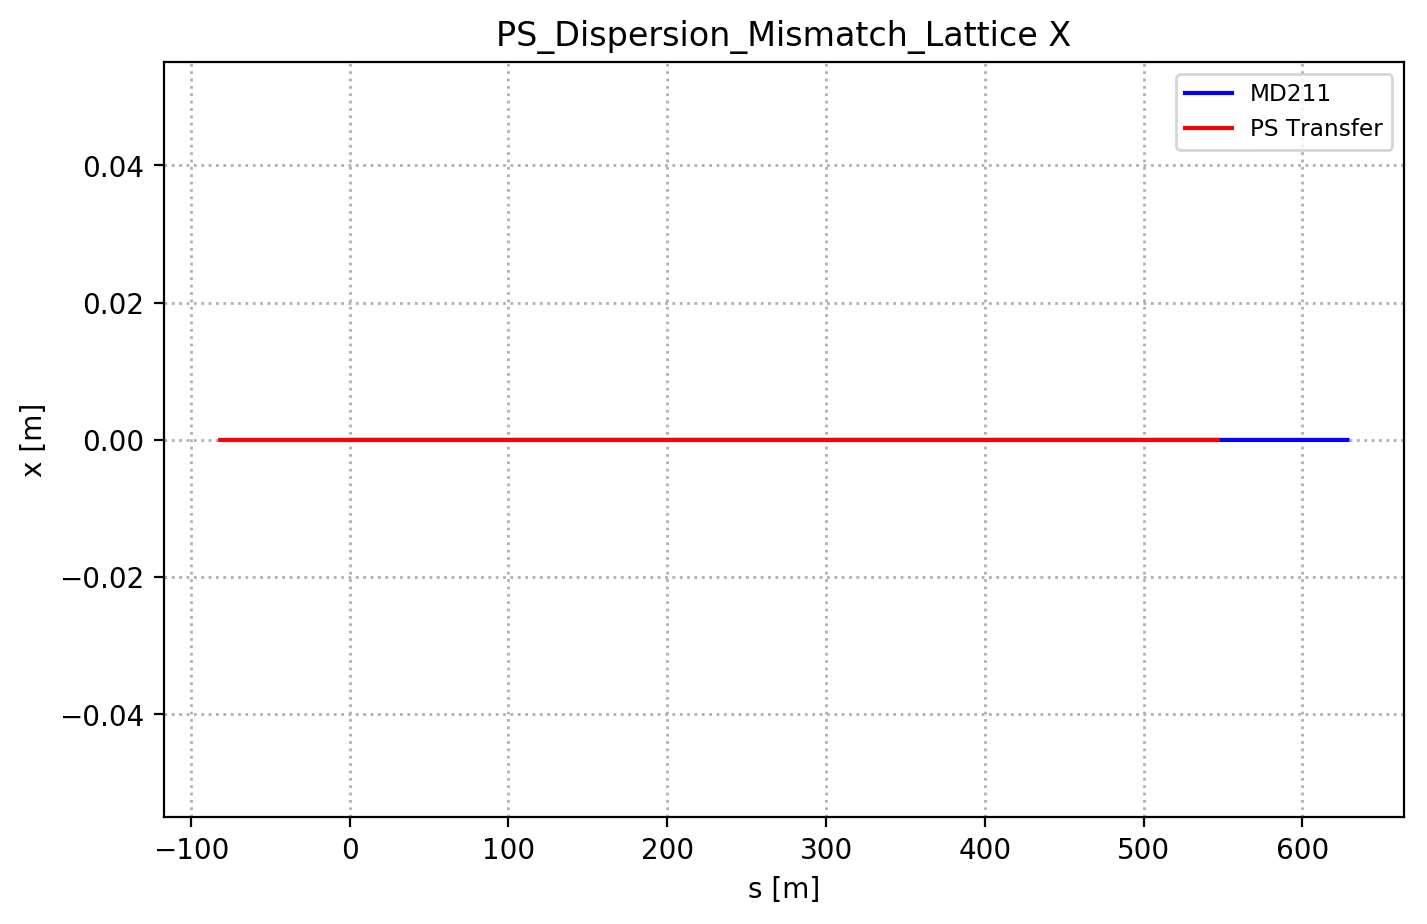

In [29]:
parameter = 'X'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel('x [m]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');
#ax1.plot(d_ps_transfer['S'], d_ps_transfer[parameter], label='PS Transfer', color='r');
ax1.plot(x, y, label='PS Transfer', color='r');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-10,10)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 200);

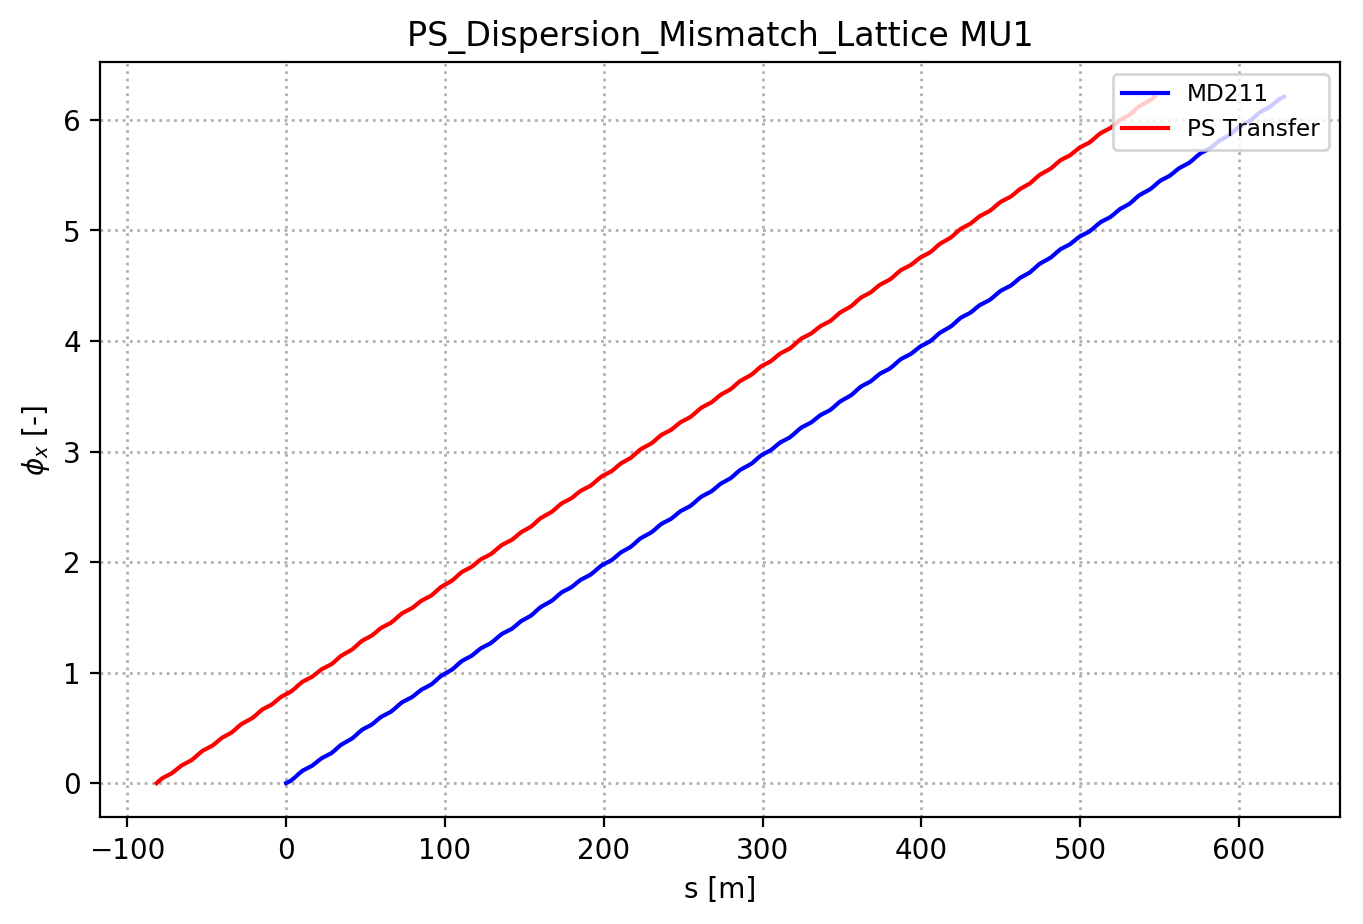

In [30]:
parameter = 'MU1'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'$\phi_x$ [-]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');
#ax1.plot(d_ps_transfer['S'], d_ps_transfer[parameter], label='PS Transfer', color='r');
ax1.plot(x, y, label='PS Transfer', color='r');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-10,10)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 200);

## Difference between MAD-X versions

- MD211 using MAD-X v 5.02.00 (blue)
- PS Transfer using MAD-X 5.05.02 (green)
- difference of reduced velocity $\beta$
- correct value shown by multiplying MAD-X v 5.02.00 by $\beta$

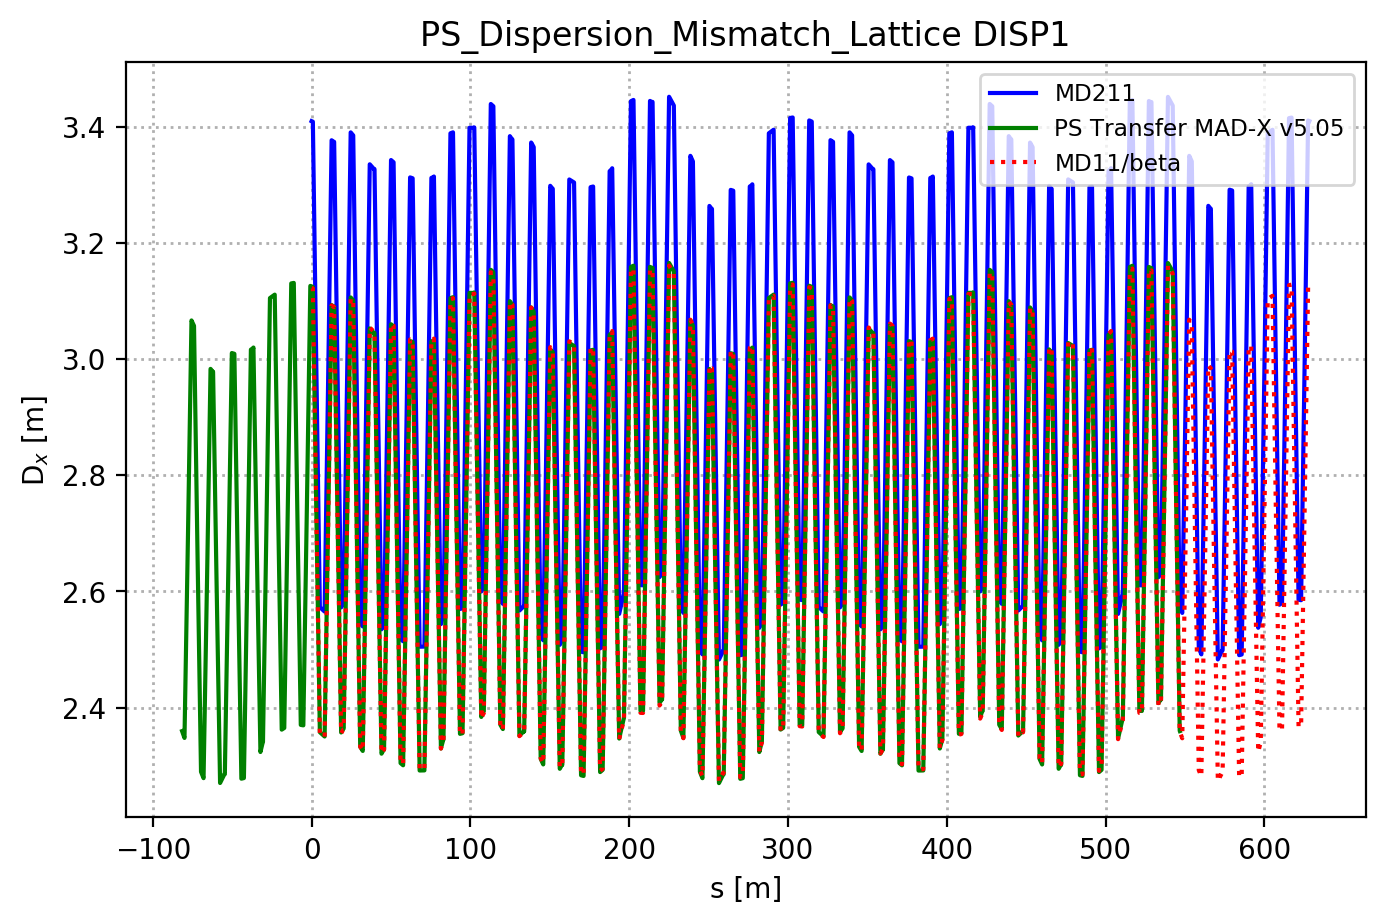

In [25]:
parameter = 'DISP1'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'D$_x$ [m]');

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]
ax1.plot(x, y, label='PS Transfer MAD-X v5.05', color='g');

xx = np.array(d_md211['S'])
yy = np.array(d_md211[parameter])*0.9158
ax1.plot(xx, yy, label='MD11/beta', color='r', ls=':')
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-10,10)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 200);

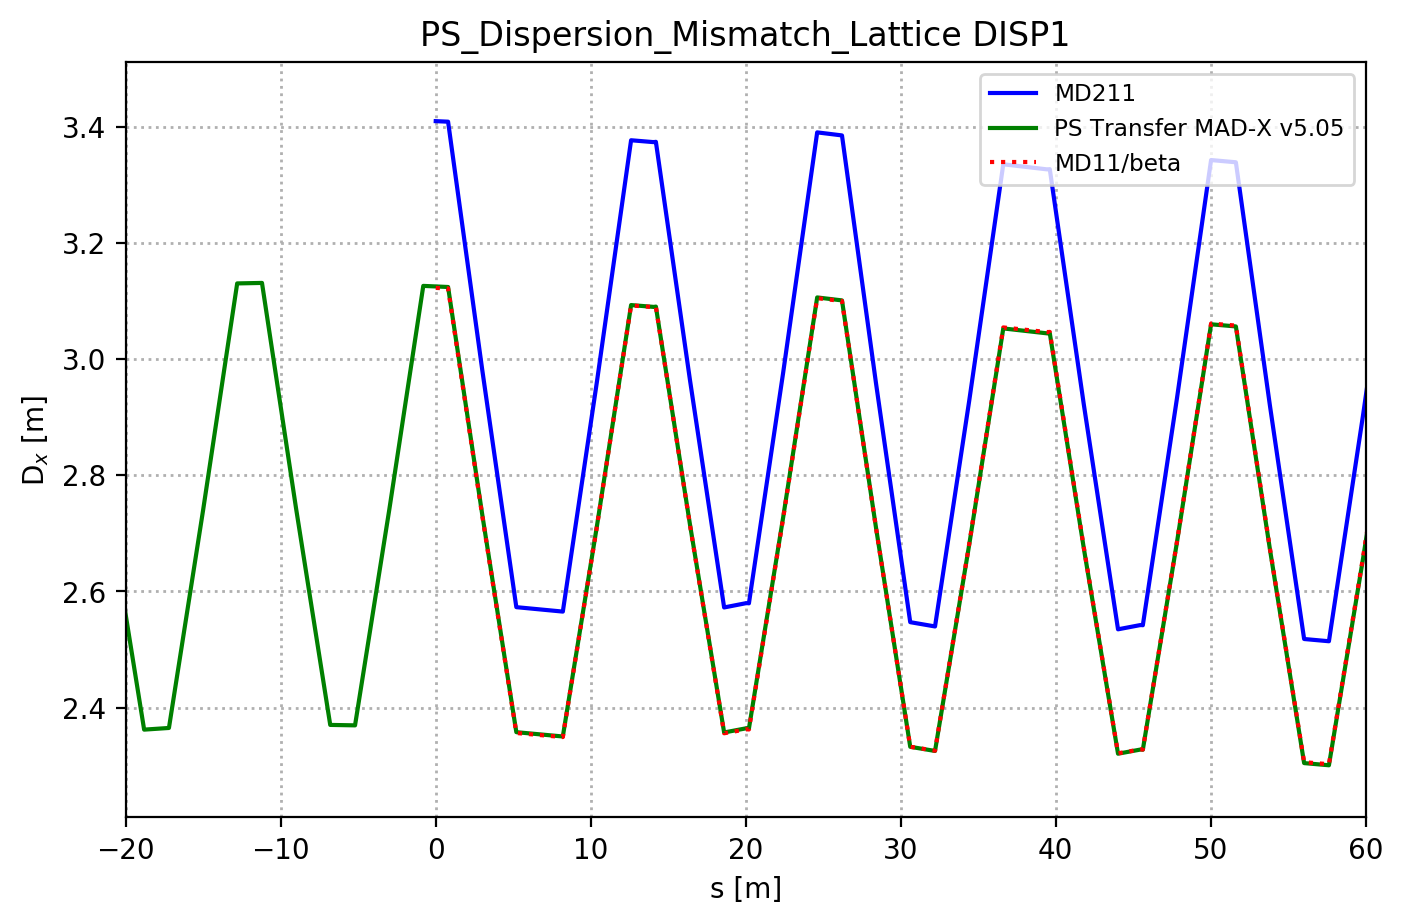

In [26]:
parameter = 'DISP1'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'D$_x$ [m]');

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]
ax1.plot(x, y, label='PS Transfer MAD-X v5.05', color='g');

xx = np.array(d_md211['S'])
yy = np.array(d_md211[parameter])*0.9158
ax1.plot(xx, yy, label='MD11/beta', color='r', ls=':')
      
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-20,60)

savename = save_folder + '/'+ main_label + '_' + parameter + '_zoom.png'
plt.savefig(savename, dpi = 200);

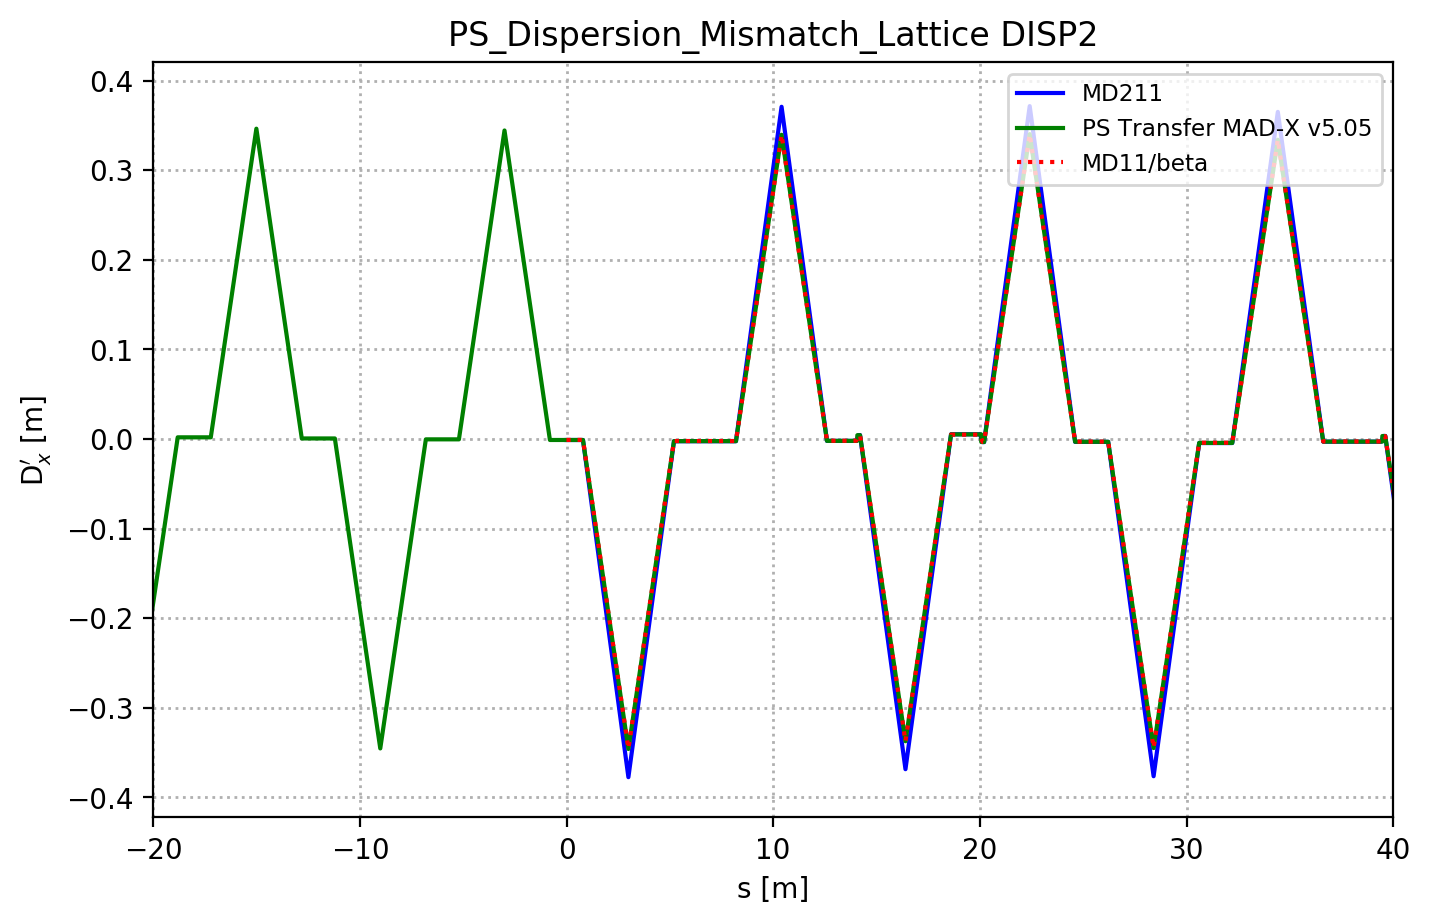

In [27]:
parameter = 'DISP2'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'D$_{x}^{\prime}$ [m]');

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]
ax1.plot(x, y, label='PS Transfer MAD-X v5.05', color='g');

xx = np.array(d_md211['S'])
yy = np.array(d_md211[parameter])*0.9158
ax1.plot(xx, yy, label='MD11/beta', color='r', ls=':')
  
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-20,40)

savename = save_folder + '/'+ main_label + '_' + parameter + '_zoom.png'
plt.savefig(savename, dpi = 200);

In [ ]:
parameter = 'DISP2'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'D$_{x}^{\prime}$ [m]');

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]
ax1.plot(x, y, label='PS Transfer MAD-X v5.05', color='g');

xx = np.array(d_ps_transfer['S'])-s_offset
yy = np.array(d_ps_transfer[parameter])/0.9158
ax1.plot(xx, yy, label='PS Transfer/beta', color='r', ls=':');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-10,10)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 200);

## Step 5: Dispersion mismatch

From Matthew Fraser CERN TE-ABT: 
    As measured from BSG H52 SEM grid (see https://indico.cern.ch/event/828559/contributions/3528423/attachments/1938485/3214110/MFraser_SpaceChargeWS_PS_blowup.pdf):
    
    Operational D_x  = 2.633 m
    Operational D_x' = -0.1104
    
    ReMatched D_x  = 2.683 m
    ReMatched D_x' = -0.021

In [ ]:
print 's [m]\tNAME\t\tD_x'
print d_ps_transfer['S'][0],'\t', d_ps_transfer['NAME'][0],'\t', d_ps_transfer['DISP1'][0]

In [ ]:
Delta_D_x = 2.633 - d_ps_transfer['DISP1'][0]
print 'Delta_D_x = ', Delta_D_x

In [ ]:
Delta_D_xp = -0.1104 - d_ps_transfer['DISP2'][0]
print 'Delta_D_xp = ', Delta_D_xp

Our new values will be:

In [ ]:
print round_sig(d_md211['DISP1'][0]*0.9158,4), ' m\t->', round_sig((d_md211['DISP1'][0]*0.9158)+Delta_D_x,4), ' m'

In [ ]:
print round_sig(d_md211['DISP2'][0]*0.9158,4), ' \t->', round_sig((d_md211['DISP2'][0]*0.9158)+Delta_D_xp,4),

## Normalised dispersion

$$ \bar{D}_x = \frac{D_x}{\sqrt{\beta_x}} $$

In [ ]:
parameter1 = 'DISP1'
parameter2 = 'BETX'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'$\frac{D_x}{\sqrt{\beta_x}}$ [$m^{\frac{1}{2}}$]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter1]/np.sqrt(d_ps_transfer[parameter2])
ax1.plot(x, y, label='PS Transfer', color='r');

xx = np.array(d_md211['S'])
yy = np.array(0.9158*(d_md211[parameter1]/np.sqrt(d_md211[parameter2])))
ax1.plot(xx, yy, label='MD211', color='b');

        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-10,10)

savename = save_folder + '/'+ main_label + '_' + parameter1 + '_norm.png'
plt.savefig(savename, dpi = 200);

In [ ]:
parameter1 = 'DISP1'
parameter2 = 'BETX'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'$\frac{D_x}{\sqrt{\beta_x}}$ [$m^{\frac{1}{2}}$]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter1]/np.sqrt(d_ps_transfer[parameter2])
ax1.plot(x, y, label='PS Transfer', color='r');

xx = np.array(d_md211['S'])
yy = np.array(0.9158*(d_md211[parameter1]/np.sqrt(d_md211[parameter2])))
ax1.plot(xx, yy, label='MD211', color='b');

        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-83,10)
#ax1.set_ylim(0.655,0.675)

savename = save_folder + '/'+ main_label + '_' + parameter1 + '_norm_zoom.png'
plt.savefig(savename, dpi = 200);

# From measurements

From Matthew's talk: measurements show that the turn-by-turn dispersion at the SEM grid is beating around a different closed dispersion than that expected from the model. This is summarised in slide 9 of his talk.

In [ ]:
img = WImage(filename='MFraser_SpaceChargeWS_PS_blowup.pdf[8]')
img

On the left hand plot the dashed straight lines (red, blue) represent the value around which the dispersion beats, this is taken as the measured closed dispersion value. The black dashed straight line is the value expected from the model (via PTC Twiss) for illustration of the difference between expectation and measurement.

### Closed Dispersion @ SEM Grid:
- Model (value from PTC Twiss)
    - D_x_0 = 2.35 m
- Operational (measured)
    - D_x_0 = 2.60 m
- ReMatched (measured)
    - D_x_0 = 2.55 m

We can confirm the first value from our PTC Twiss table

In [ ]:
print 'PS Transfer D_x_0 (@ BSGH52) = ', round_sig(d_ps_transfer['DISP1'][0],4), 'm'

If we look at the MD211 PTC Twiss, our initial value is different due to having a different reference start position.

In [ ]:
print 'MD211 D_x_0 (@ BWSH65) = ', round_sig(d_md211['DISP1'][0]*0.9158,4), 'm'

Our goal is to apply the same mismatch at a different position.

By normalising: $$ \bar{D}_x = \frac{D_x}{\sqrt{\beta_x}} $$

we can fit the turn-by-turn beating to obtain the mismatch amplitude $M_D$:
$$ \bar{D}_x(n) = \bar{D}_{x_0}(n) + M_D cos(\theta + 2\pi(n-1)q_x)$$

In [ ]:
img = WImage(filename='MFraser_SpaceChargeWS_PS_blowup.pdf[9]')
img

We may compare the dashed black line with our PTC Twiss normalised starting dispersion.

$\frac{D_{x_0}}{\sqrt{\beta_x}} = $

In [ ]:
print round_sig(d_ps_transfer['DISP1'][0]/np.sqrt(d_ps_transfer['BETX'][0]),4), 'm^{1/2}'
print 'From Talk:', round_sig(2.35/np.sqrt(12.04)), 'm^{1/2}'

Note there is some small difference as the beta values are different (one measured, one from PTC twiss).

Using 
$$ \bar{D}_x(n) = \bar{D}_{x_0}(n) + M_D cos(\theta + 2\pi(n-1)q_x)$$

With $D_{x_0}$ = 2.35 (use Matt's values from slide 9) we may use fitted values from dispersion vector simulations (found in PS Transfer repository) to check our values with the measurement data shown on the slides.

- Operational:

In [ ]:
#beta_x = d_ps_transfer['BETX'][0]
beta_x = 12.04 #Matt's value (measured)
d_x0 = 2.60
M_D = 0.350
theta = 1.36

print 'D_x_0_normalised = ', round_sig(d_x0/np.sqrt(beta_x)), ' m^{1/2}'
print 'D_x_0 = ', round_sig(d_x0), 'm'

D_bar_x_1 = (d_x0/np.sqrt(beta_x)) + M_D*np.cos(theta)
print '\nAfter mismatch D_x_0_normalised = ',round_sig(D_bar_x_1), ' m^{1/2}'
print 'After mismatch D_x_0 = ', round_sig(D_bar_x_1*np.sqrt(beta_x)), 'm'
print 'From slide D_x_0_normalised = ', round_sig(2.903/np.sqrt(beta_x)), ' m^{1/2}'
print 'From slide D_x_0 = ', round_sig(2.903), ' m'

# check turn 5
turn = 5
q_x = 0.2182

D_bar_x_1 = (d_x0/np.sqrt(beta_x)) + M_D*np.cos(theta + (2*np.pi*(turn-1)*q_x))
print '\n5 turns after mismatch D_x_5_normalised = ',round_sig(D_bar_x_1), ' m^{1/2}'
print '5 turns after mismatch D_x_5 = ',round_sig(D_bar_x_1*np.sqrt(beta_x)), ' m'
print 'From slide ~ ', round_sig(3.8/np.sqrt(12.04)), ' m^{1/2}'
print 'From slide ~ ', round_sig(3.8), ' m'

# check turn 5
turn = 12
q_x = 0.2182

D_bar_x_1 = (d_x0/np.sqrt(beta_x)) + M_D*np.cos(theta + (2*np.pi*(turn-1)*q_x))
print '\n12 turns after mismatch D_x_5_normalised = ',round_sig(D_bar_x_1), ' m^{1/2}'
print '12 turns after mismatch D_x_5 = ',round_sig(D_bar_x_1*np.sqrt(beta_x)), ' m'
print 'From slide ~ ', round_sig(1.5/np.sqrt(12.04)), ' m^{1/2}'
print 'From slide ~ ', round_sig(1.5), ' m'

- ReMatched

In [ ]:
#beta_x = d_ps_transfer['BETX'][0]
beta_x = 12.04 #Matt's value (measured)
d_x0 = 2.55
M_D = 0.107
theta = 0.5285

print 'D_x_0_normalised = ', round_sig(d_x0/np.sqrt(beta_x)), ' m^{1/2}'
print 'D_x_0 = ', round_sig(d_x0), 'm'

D_bar_x_1 = (d_x0/np.sqrt(beta_x)) + M_D*np.cos(theta)
print '\nAfter mismatch D_x_0_normalised = ',round_sig(D_bar_x_1), ' m^{1/2}'
print 'After mismatch D_x_0 = ', round_sig(D_bar_x_1*np.sqrt(beta_x)), 'm'
print 'From slide D_x_0_normalised = ', round_sig(2.889/np.sqrt(beta_x)), ' m^{1/2}'
print 'From slide D_x_0 = ', round_sig(2.889), ' m'

# check turn 5
turn = 5
q_x = 0.2183

D_bar_x_1 = (d_x0/np.sqrt(beta_x)) + M_D*np.cos(theta + (2*np.pi*(turn-1)*q_x))
print '\n5 turns after mismatch D_x_5_normalised = ',round_sig(D_bar_x_1), ' m^{1/2}'
print '5 turns after mismatch D_x_5 = ',round_sig(D_bar_x_1*np.sqrt(beta_x)), ' m'
print 'From slide ~ ', round_sig(2.9/np.sqrt(12.04)), ' m^{1/2}'
print 'From slide ~ ', round_sig(2.9), ' m'

# check turn 12
turn = 12
q_x = 0.2182

D_bar_x_1 = (d_x0/np.sqrt(beta_x)) + M_D*np.cos(theta + (2*np.pi*(turn-1)*q_x))
print '\n12 turns after mismatch D_x_5_normalised = ',round_sig(D_bar_x_1), ' m^{1/2}'
print '12 turns after mismatch D_x_5 = ',round_sig(D_bar_x_1*np.sqrt(beta_x)), ' m'
print 'From slide ~ ', round_sig(2.2/np.sqrt(12.04)), ' m^{1/2}'
print 'From slide ~ ', round_sig(2.2), ' m'

### Using our dispersion vector simulations to find theta (using Matt's provided $D_{x_0}$ $D_{x_0}^{\prime}$ values to match the dispersion mismatch amplitude), we can fit the measurement reasonably well

We see from Matt's measurements that the dispersion mismatch amplitude is roughly constant over the whole machine.

In [ ]:
img = WImage(filename='MFraser_SpaceChargeWS_PS_blowup.pdf[11]')
img

In simulations, Matt adjusted the initial conditions in simulations such that the relative turn-by-turn dispersion beating was reproduced. The measured D_x values were shifted, D_px was fitted until the relative turn-by-turn beating in simulations matched measurements.

In [ ]:
img = WImage(filename='MFraser_SpaceChargeWS_PS_blowup.pdf[13]')
img

In [ ]:
img = WImage(filename='MFraser_SpaceChargeWS_PS_blowup.pdf[14]')
img

### Model values from PTC Twiss
- Lattice (MAD-X v 5.02.00 PTC Twiss D_x_0 = 2.576404793*0.9158 = 2.3536)
    - $D_{x_0}$ = 2.35 m
    - $D_{x_0}^{\prime}$ = -0.007439

### Values from Matt's matching simulations of mismatch amplitude beating
- Operational
    - $D_{x_0}$ = 2.633 m
    - $D_{x_0}^{\prime}$ = -0.1104 (typo in Matt's slide)
    - $M_D$ = 0.35
- ReMatched
    - $D_{x_0}$ = 2.683 m
    - $D_{x_0}^{\prime}$ = -0.022
    - $M_D$ = 0.107

# Apply mismatch to new location 

### Assuming:
- closed dispersion at wire-scanner is PTC twiss value of $D_{x_{wire-scanner}}$ = 3.123 m
- mismatch amplitude $M_D$ = 0.350
- phase of mismatch $\theta$ = 1.36
- $\beta_{x_{wire-scanner}}$ = 22.45

- Normalised dispersion 

$$\bar{D_x} = \frac{D_x}{\sqrt{\beta_x}} = \frac{3.123}{4.738} = 0.6591~m^{\frac{1}{2}}$$

$$ \bar{D_x}_{wire-scanner_{mismatched}} = D_{x_{wire-scanner}} + M_D cos (\theta) = 0.6591 + 0.35 cos(1.36) = 0.732~m^{\frac{1}{2}}$$

$$ D_{x_{wire-scanner_{mismatched}}} = 0.732 \sqrt{22.45} = 3.468~m$$

- Normalised dispersion delta constructed to be the same magnitude and phase

$$\Delta \bar{D_x}_{wire-scanner} = 0.732-0.6591 = 0.073~m^{\frac{1}{2}}$$

$$\Delta \bar{D_x}_{SEM Grid} = 0.823-0.749 = 0.074~m^{\frac{1}{2}}$$

- Absolute dispersion delta 
$$ \Delta D_{x_{wire-scanner}} = 3.468 - 3.123 = 0.345~m $$

$$ \Delta D_{x_{SEM Grid}} = 2.633 - 2.35 = 0.283~m $$

## Working method

- Normalised dispersion 

$$\bar{D_x} = \frac{D_x}{\sqrt{\beta_x}} = \frac{3.123}{4.737} = 0.659~m^{\frac{1}{2}}$$

- Take cosine term as maximum (=1)
$$ \bar{D_x}_{wire-scanner_{mismatched}} = D_{x_{wire-scanner}} + M_D cos (\theta) = 0.659 + 0.35 = 1.0091~m^{\frac{1}{2}}$$

$$ D_{x_{wire-scanner_{mismatched}}} = 1.009 \sqrt{22.435} = 4.78~m$$

- Normalised dispersion delta constructed to be the same magnitude and phase

$$\Delta \bar{D_x}_{wire-scanner} = 0.732-0.6591 = 0.073~m^{\frac{1}{2}}$$

$$\Delta \bar{D_x}_{SEM Grid} = 0.823-0.749 = 0.074~m^{\frac{1}{2}}$$

- Absolute dispersion delta 
$$ \Delta D_{x_{wire-scanner}} = 3.468 - 3.123 = 0.345~m $$

$$ \Delta D_{x_{SEM Grid}} = 2.633 - 2.35 = 0.283~m $$